# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## Brandon Tatani - 931529

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

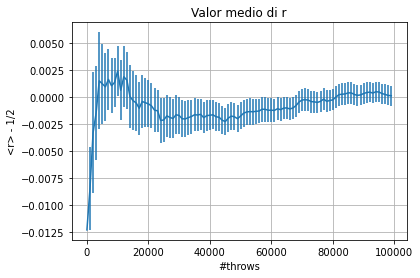

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

M = 100000
N = 100
L = M/N
x = np.arange(N)*L

r, err_r = np.loadtxt('output1_11.dat', delimiter=' ', usecols =(0,1), unpack = 'true')

plt.errorbar(x, r, yerr=err_r)
plt.grid('show')
plt.title('Valor medio di r')
plt.xlabel('#throws')
plt.ylabel('<r> - 1/2')
plt.show()

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

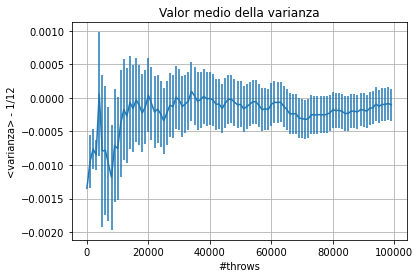

In [4]:
var, err_var = np.loadtxt('output1_12.dat', usecols=(0,1), delimiter=' ', unpack='true')

plt.errorbar(x, var, yerr=err_var)
plt.grid('show')
plt.title('Valor medio della varianza')
plt.xlabel('#throws')
plt.ylabel('<varianza> - 1/12')
plt.show()

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

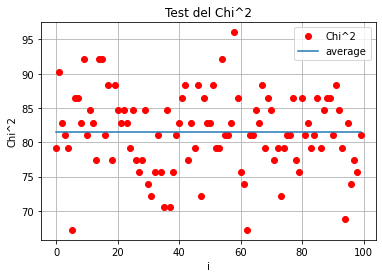

In [13]:
chi = np.loadtxt('output1_13.dat')
ave = 0

for i in chi:
    ave += i/N

x = np.arange(N)
chi_ave = np.ones(N)*ave

plt.plot(x, chi, 'ro', label='Chi^2')
plt.plot(x, chi_ave, label='average')
plt.grid('show')
plt.title('Test del Chi^2')
plt.xlabel('i')
plt.ylabel('Chi^2')
plt.legend()
plt.show()

As we expected from the theory the average value of $\chi^2$ is lower than $n/M \simeq 100$; so the result is compatible with the hypothesis($n_i$ drawn from a uniform distribution).

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

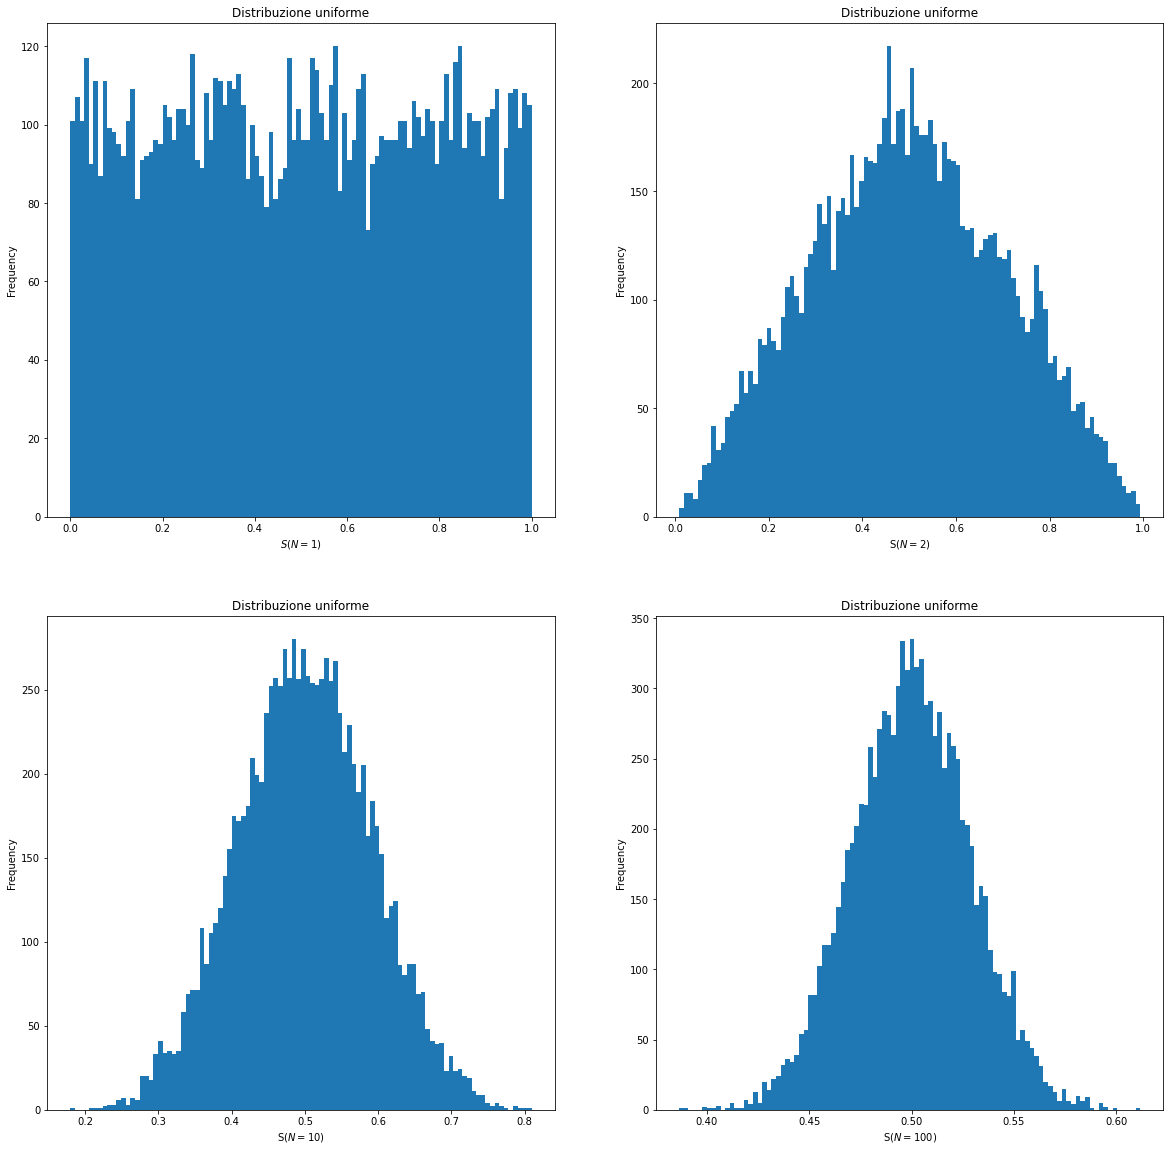

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


du = pd.read_csv('figura_1.csv')
#df.head(10000)

y = du['N100']


plt.figure(figsize=(20, 20))

plt.subplots_adjust()

#distribuzione uniforme
plt.subplot(221)
du['N1'].plot(kind='hist', bins=100, title='Distribuzione uniforme')
plt.xlabel(r'$S(N=1)$')

plt.subplot(222)
du['N2'].plot(kind='hist', bins=100, title='Distribuzione uniforme')
plt.xlabel(r'S$(N=2)$')

plt.subplot(223)
du['N10'].plot(kind='hist', bins=100, title='Distribuzione uniforme')
plt.xlabel(r'S$(N=10)$')

plt.subplot(224)
du['N100'].plot(kind='hist', bins=100, title='Distribuzione uniforme')
plt.xlabel(r'S$(N=100)$')

plt.show()

i parametri per il fit sono: [ 0.49992713  0.02884231 22.51707443]


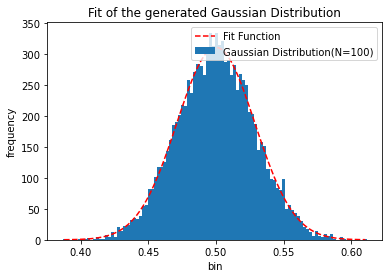

In [18]:
from scipy.optimize import curve_fit
import math

dy, bins = np.histogram(y, bins=100)
dx = np.zeros(100)
for i in range(100):
    dx[i] = (bins[i] + bins[i+1])*0.5
    
def gaussian(x, mu, sigma, N):
    return N*np.exp(-0.5*((x-mu)/sigma)**2)/np.sqrt(2*math.pi*sigma**2)

popt, conv = curve_fit(gaussian, dx, dy)
print("i parametri per il fit sono:", popt)

plt.hist(y, bins=100, label='Gaussian Distribution(N=100)')
plt.plot(dx, gaussian(dx, *popt), 'r--', label='Fit Function')
plt.title('Fit of the generated Gaussian Distribution')
plt.xlabel('bin')
plt.ylabel('frequency')
plt.legend()
plt.show()

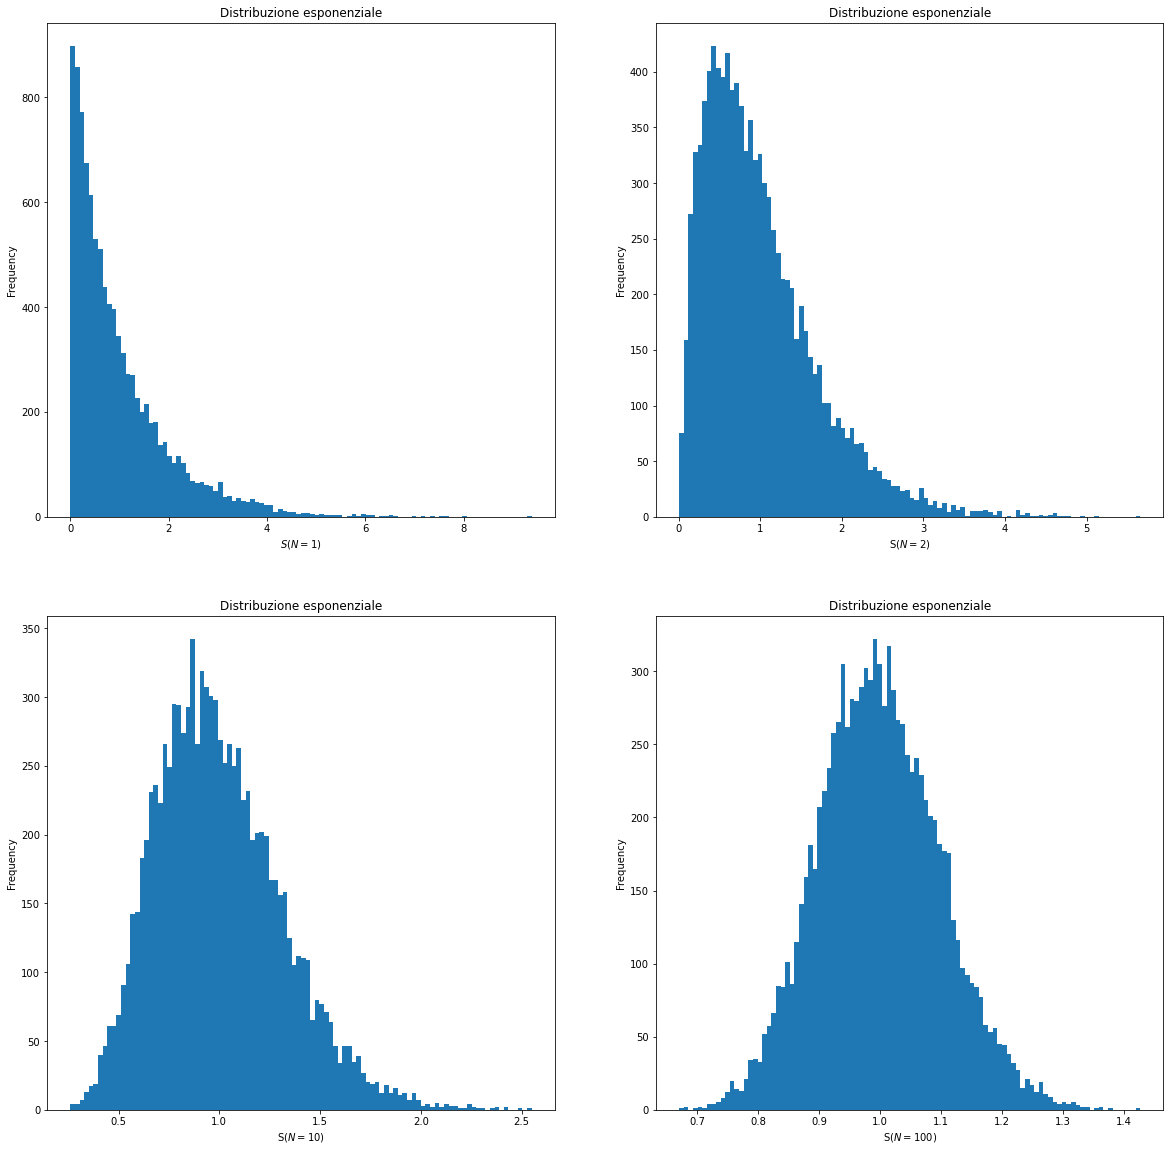

In [24]:
de = pd.read_csv('figura_2.csv')
y = de['N100']

plt.figure(figsize=(20, 20))

plt.subplots_adjust()

#distribuzione esponenziale
plt.subplot(221)
de['N1'].plot(kind='hist', bins=100, title='Distribuzione esponenziale')
plt.xlabel(r'$S(N=1)$')

plt.subplot(222)
de['N2'].plot(kind='hist', bins=100, title='Distribuzione esponenziale')
plt.xlabel(r'S$(N=2)$')

plt.subplot(223)
de['N10'].plot(kind='hist', bins=100, title='Distribuzione esponenziale')
plt.xlabel(r'S$(N=10)$')

plt.subplot(224)
de['N100'].plot(kind='hist', bins=100, title='Distribuzione esponenziale')
plt.xlabel(r'S$(N=100)$')

plt.show()


i parametri per il fit sono: [ 0.99407657 -0.09947086 75.63572699]


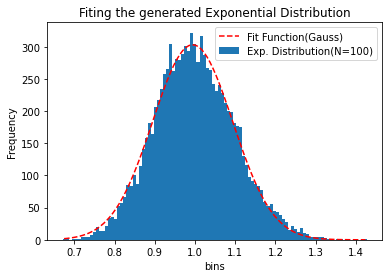

In [23]:
dy, bins = np.histogram(y, bins=100)
dx = np.zeros(100)
for i in range(100):
    dx[i] = (bins[i] + bins[i+1])*0.5
    
popt, conv = curve_fit(gaussian, dx, dy)
print("i parametri per il fit sono:", popt)

plt.hist(y, bins=100, label='Exp. Distribution(N=100)')
plt.plot(dx, gaussian(dx, *popt), 'r--', label='Fit Function(Gauss)')
plt.title('Fiting the generated Exponential Distribution')
plt.xlabel('bins')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As we can see from the plots the exponential distribution generated is better fitted by a gaussian the larger N becomes, thus follows the prediction of the  **Central Limit Theorem**

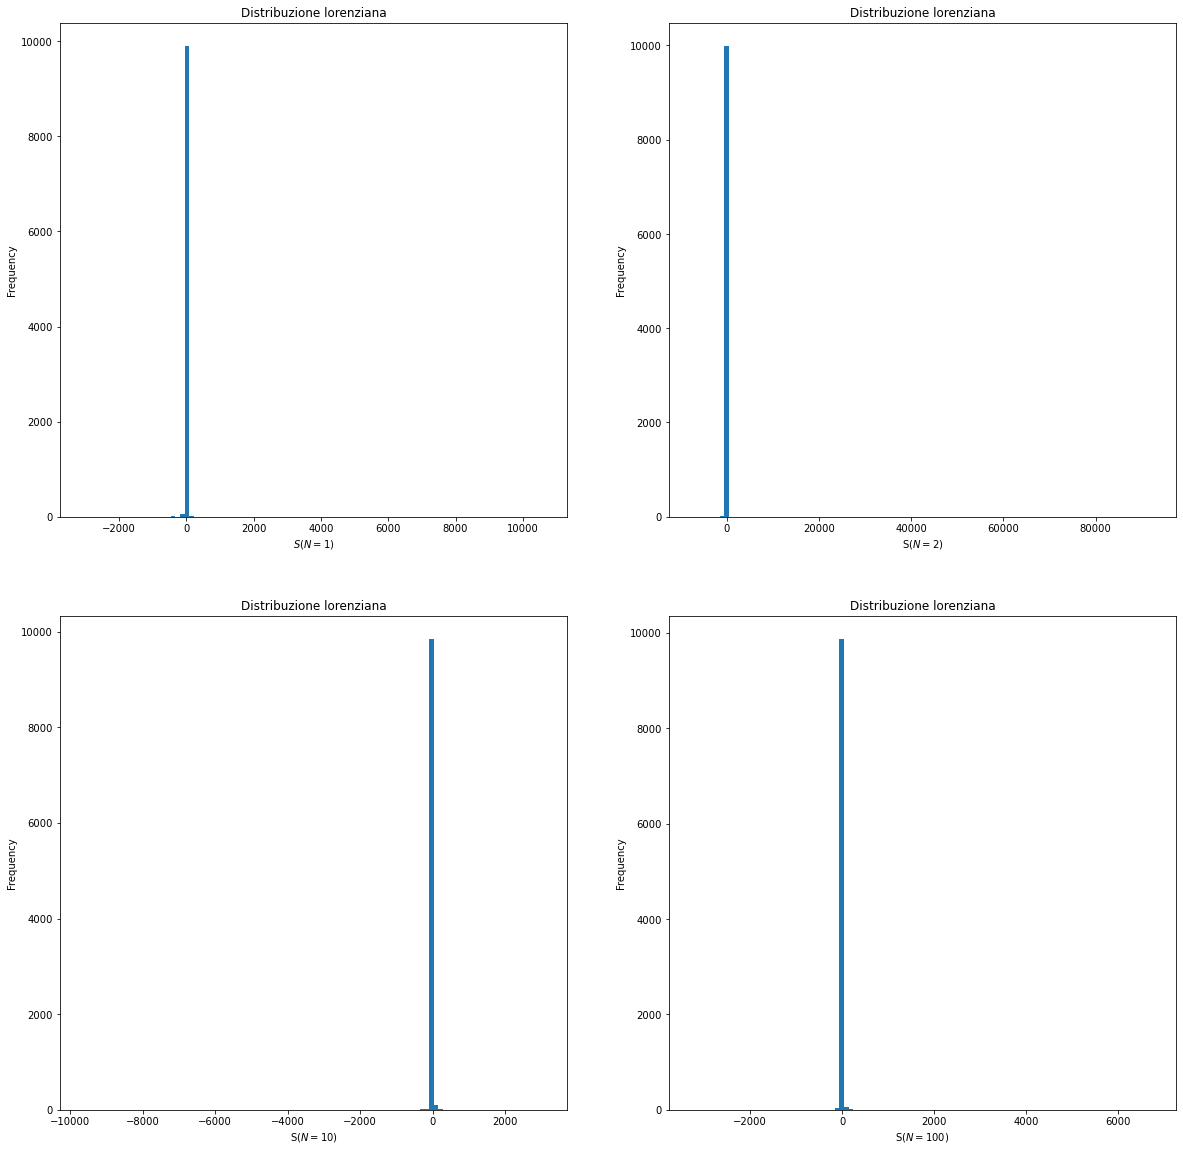

In [25]:
dl = pd.read_csv('figura_3.csv')
y = dl['N100']

plt.figure(figsize=(20, 20))

plt.subplots_adjust()

#distribuzione lorenziana
plt.subplot(221)
dl['N1'].plot(kind='hist', bins=100, title='Distribuzione lorenziana')
plt.xlabel(r'$S(N=1)$')

plt.subplot(222)
dl['N2'].plot(kind='hist', bins=100, title='Distribuzione lorenziana')
plt.xlabel(r'S$(N=2)$')

plt.subplot(223)
dl['N10'].plot(kind='hist', bins=100, title='Distribuzione lorenziana')
plt.xlabel(r'S$(N=10)$')

plt.subplot(224)
dl['N100'].plot(kind='hist', bins=100, title='Distribuzione lorenziana')
plt.xlabel(r'S$(N=100)$')

plt.show()


/home/brandon/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


i parametri per il fit sono: [-9.70673686e+00  2.54945882e-05]


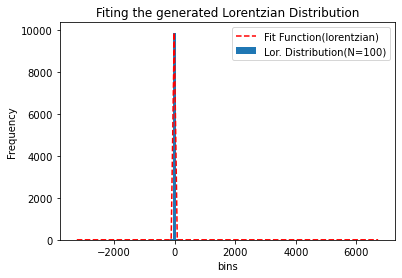

In [27]:
dy, bins = np.histogram(y, bins=100)
dx = np.zeros(100)
for i in range(100):
    dx[i] = (bins[i] + bins[i+1])*0.5
    
def lorenz(x, mu, gamma):
    return (gamma/((x-mu)**2 + gamma**2))/math.pi

popt, conv = curve_fit(lorenz, dx, dy)
print("i parametri per il fit sono:", popt)

plt.hist(y, bins=100, label='Lor. Distribution(N=100)')
plt.plot(dx, lorenz(dx, *popt), 'r--', label='Fit Function(lorentzian)')
plt.title('Fiting the generated Lorentzian Distribution')
plt.xlabel('bins')
plt.ylabel('Frequency')
plt.legend()
plt.show()

The Distribution generated represent a Lorentzian distribution centered in $x=0$ with a infinite $variance$. 

### Exercise 01.3
- **Simulate** the Buffonâ€™s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

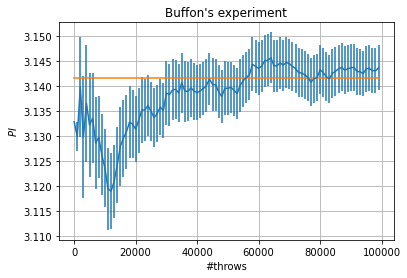

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

N = 100
L = 100000/N
x= np.arange(N)*L
PI = np.ones(N)*math.pi


dPI = pd.read_csv('output1_3.csv')

plt.errorbar(x, dPI['pi'], yerr = dPI['errore'])
plt.plot(x, PI)
plt.title("Buffon's experiment")
plt.xlabel('#throws')
plt.ylabel('$PI$')
plt.grid('show')

plt.show()